In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [2]:
df = pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',', na_values=[-200], encoding='latin1')
df.drop(columns=df.columns[[15, 16]], inplace=True)

df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

In [3]:
def fix_time(t): return str(t).replace('.', ':')

dt = pd.to_datetime(df["Date"] + " " + df["Time"].map(fix_time), dayfirst=True, errors="coerce")
dfp = df.drop(columns=["Date", "Time"])
dfp.insert(0, "datetime", dt)
dfp = dfp.set_index("datetime").sort_index()

dfp

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Selected feature

In [4]:
co = dfp['PT08.S1(CO)']

print(f"PT08.S1(CO) has {co.isna().sum()} missing values.")
co.describe()

PT08.S1(CO) has 480 missing values.


count    8991.000000
mean     1099.833166
std       217.080037
min       647.000000
25%       937.000000
50%      1063.000000
75%      1231.000000
max      2040.000000
Name: PT08.S1(CO), dtype: float64

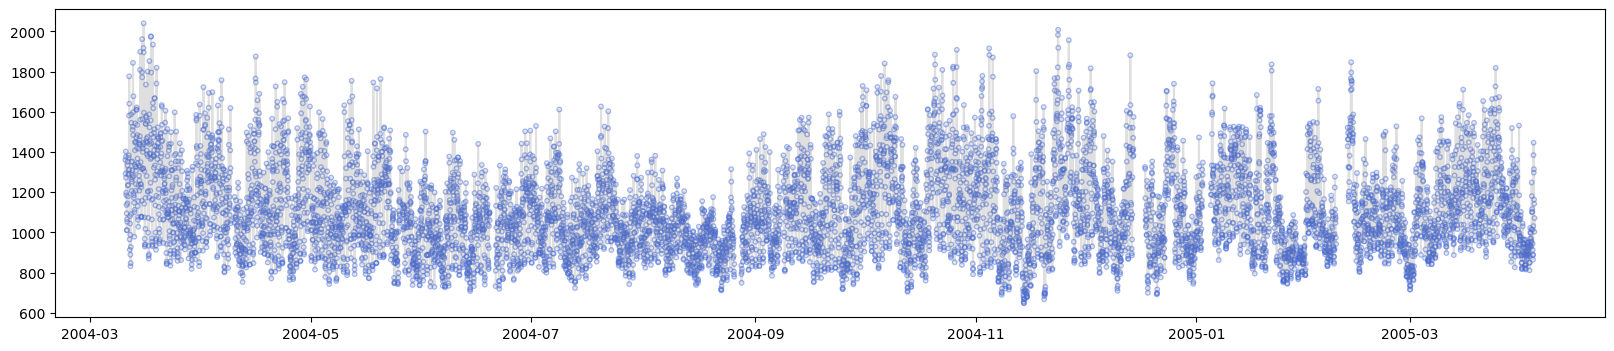

In [5]:
plt.figure(figsize=(20, 4))
plt.scatter(co.index, co.values, s=10, color="none", edgecolor="royalblue", alpha=.5)
plt.plot(co.index, co.values, color="grey", alpha=.25)
plt.show()

## Limit records

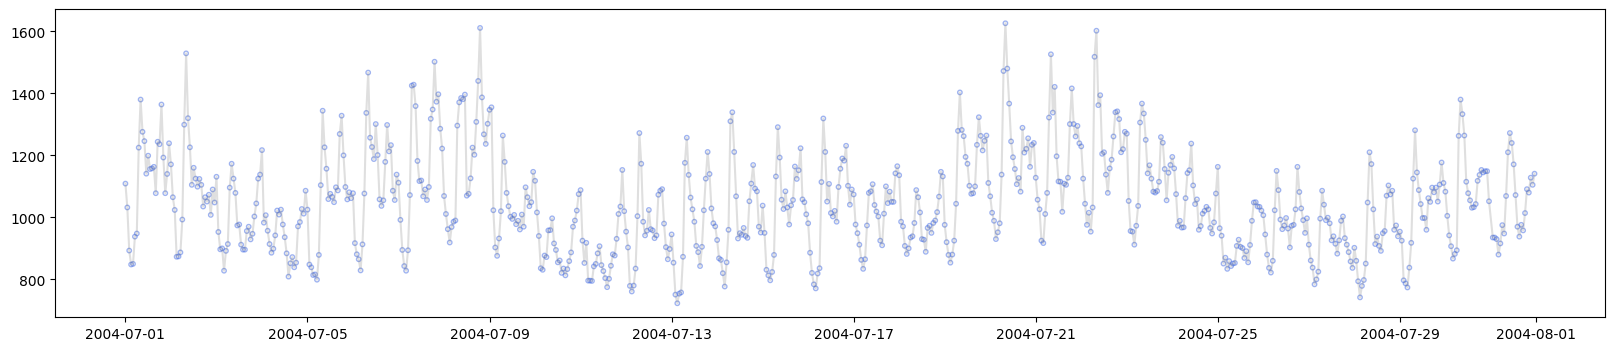

In [6]:
focus = co[(co.index.year == 2004) & (co.index.month == 7)].dropna()

plt.figure(figsize=(20, 4))
plt.scatter(focus.index, focus.values, s=10, color="none", edgecolor="royalblue", alpha=.5)
plt.plot(focus.index, focus.values, color="grey", alpha=.25)
plt.show()

## Create labeled set

For rush hour 6AM-10AM only in July 2004.

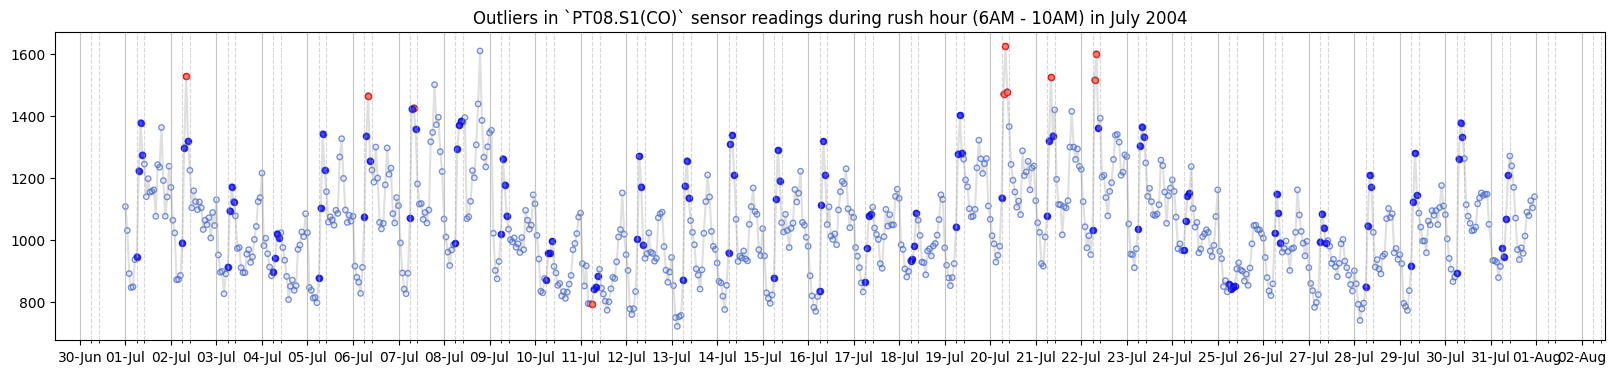

,abnormal
datetime,
2004-07-01 06:00:00,False
2004-07-01 07:00:00,False
2004-07-01 08:00:00,False
2004-07-01 09:00:00,False
2004-07-02 06:00:00,False
...,...
2004-07-30 09:00:00,False
2004-07-31 06:00:00,False
2004-07-31 07:00:00,False


In [7]:
import matplotlib.dates as mdates
from sklearn.neighbors import LocalOutlierFactor

fig, ax = plt.subplots(1, 1, figsize=(20, 4))

byhour = [6, 10]
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=byhour))
ax.grid(which='major', linestyle='-', alpha=0.75, axis="x")
ax.grid(which='minor', linestyle='--', alpha=0.5, axis="x")

h = focus.index.hour
in_rush_indices = focus.index[((h >= 6) & (h < 10))]

# focus
ax.scatter(focus.index, focus.values, s=15, color="none", edgecolor="royalblue", alpha=.75)
ax.plot(focus.index, focus.values, color="grey", alpha=.25)

# spot outliers
X = focus[in_rush_indices].values
X_index = focus.loc[in_rush_indices].index

lof = LocalOutlierFactor(n_neighbors=15, contamination=.075)
lof_labels = lof.fit_predict(X.reshape(-1, 1))

ax.scatter(X_index[lof_labels == -1], X[lof_labels == -1], s=20, color="coral", edgecolor="red", alpha=.9)
ax.scatter(X_index[lof_labels == 1], X[lof_labels == 1], s=20, color="blue", edgecolor="blue", alpha=.75)

plt.title("Outliers in `PT08.S1(CO)` sensor readings during rush hour (6AM - 10AM) in July 2004")
plt.show()

y = pd.DataFrame({'abnormal': lof_labels == -1}, index=X_index)
y

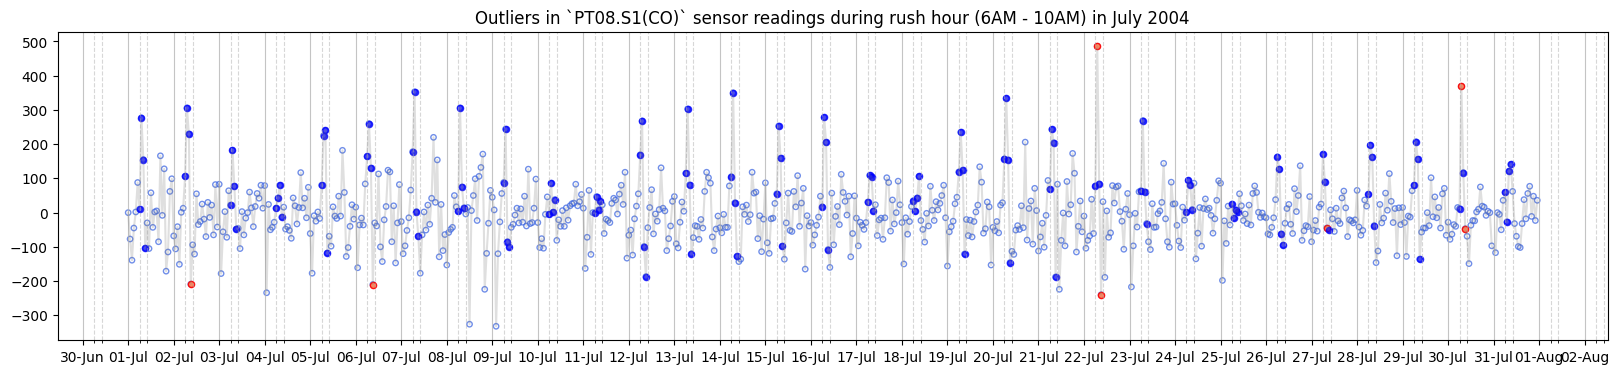

,abnormal
datetime,
2004-07-01 06:00:00,False
2004-07-01 07:00:00,False
2004-07-01 08:00:00,False
2004-07-01 09:00:00,False
2004-07-02 06:00:00,False
...,...
2004-07-30 09:00:00,True
2004-07-31 06:00:00,False
2004-07-31 07:00:00,False


In [8]:
import matplotlib.dates as mdates
from sklearn.neighbors import LocalOutlierFactor

fig, ax = plt.subplots(1, 1, figsize=(20, 4))

byhour = [6, 10]
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=byhour))
ax.grid(which='major', linestyle='-', alpha=0.75, axis="x")
ax.grid(which='minor', linestyle='--', alpha=0.5, axis="x")

h = focus.index.hour
in_rush_indices = focus.index[((h >= 6) & (h < 10))]
in_rush_indices_num = focus.reset_index().index[((h >= 6) & (h < 10))]

# focus
focus_diff_values = np.diff(focus.values, prepend=focus.values[0])
ax.scatter(focus.index, focus_diff_values, s=15, color="none", edgecolor="royalblue", alpha=.75)
ax.plot(focus.index, focus_diff_values, color="grey", alpha=.25)

# spot outliers
X = focus_diff_values[in_rush_indices_num]
X_index = focus.loc[in_rush_indices].index

lof = LocalOutlierFactor(n_neighbors=20, contamination=.05)
lof_labels = lof.fit_predict(X.reshape(-1, 1))

ax.scatter(X_index[lof_labels == -1], X[lof_labels == -1], s=20, color="coral", edgecolor="red", alpha=.9)
ax.scatter(X_index[lof_labels == 1], X[lof_labels == 1], s=20, color="blue", edgecolor="blue", alpha=.75)

plt.title("Outliers in `PT08.S1(CO)` sensor readings during rush hour (6AM - 10AM) in July 2004")
plt.show()

y2 = pd.DataFrame({'abnormal': lof_labels == -1}, index=X_index)
y2

In [9]:
timestamps1 = [ts.strftime("%Y-%m-%d %H:%M:%S") for ts in y.index[y['abnormal'] == 1]]
timestamps1

['2004-07-02 08:00:00',
 '2004-07-06 08:00:00',
 '2004-07-07 08:00:00',
 '2004-07-11 06:00:00',
 '2004-07-20 07:00:00',
 '2004-07-20 08:00:00',
 '2004-07-20 09:00:00',
 '2004-07-21 08:00:00',
 '2004-07-22 07:00:00',
 '2004-07-22 08:00:00']

In [10]:
timestamps2 = [ts.strftime("%Y-%m-%d %H:%M:%S") for ts in y2.index[y2['abnormal'] == 1]]
timestamps2

['2004-07-02 09:00:00',
 '2004-07-06 09:00:00',
 '2004-07-22 07:00:00',
 '2004-07-22 09:00:00',
 '2004-07-27 08:00:00',
 '2004-07-30 07:00:00',
 '2004-07-30 09:00:00']

In [11]:
abnormal_indices = np.union1d(timestamps1, timestamps2)
abnormal_indices.shape

(16,)

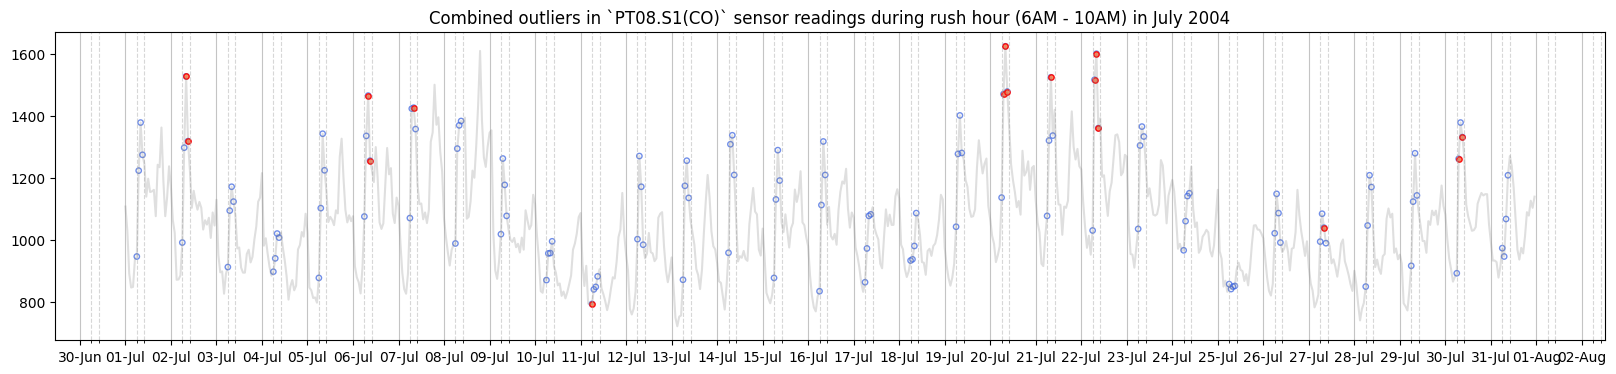

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))

byhour = [6, 10]
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=byhour))
ax.grid(which='major', linestyle='-', alpha=0.75, axis="x")
ax.grid(which='minor', linestyle='--', alpha=0.5, axis="x")

# focus
ax.scatter(focus[in_rush_indices].index, focus[in_rush_indices].values, s=15, color="none", edgecolor="royalblue", alpha=.75)
ax.plot(focus.index, focus.values, color="grey", alpha=.25)

# spot outliers
X = focus[abnormal_indices].values
X_index = focus.loc[abnormal_indices].index

ax.scatter(X_index, X, s=15, color="coral", edgecolor="red", alpha=.9)

plt.title("Combined outliers in `PT08.S1(CO)` sensor readings during rush hour (6AM - 10AM) in July 2004")
plt.show()